<a href="https://colab.research.google.com/github/joanne-gazmen/Data110-Fall2025/blob/main/Data110_JoanneGazmen_Project_1_Maryland_Public_School_Enrollment_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1: Data Visualization Mastery Report**


## **1. Dataset Selection/ Questions :**
   - **Question**: What are the current enrollment trends in Maryland?

   - **Dataset**: Maryland Public School Enrollment Trends: Kindergarten to Grade 12: 2014-2024

   - **Source**: https://opendata.maryland.gov/Education/Maryland-Public-School-Enrollment-Trends-Kindergar/9ju3-j8k6/about_data
   
   - **Explanation**: I chose to look into enrollment trends in Maryland because I was curious to see which counties had the highest enrollments. I initially wanted to do a dataset on the NFL but I just couldn't find a way to connect 3 different data visualizations to each other. With this question and dataset. I was able to highlight the Top 5 Counties in Maryland with the Best Education. Then take a deeper dive specifically in Montgomery County. Then take an even deeper dive to see which grades make up for the total enrollment for each year from 2014-2024.



## **2. Exploratory Data Analysis (EDA)**:
   - During the EDA process, I had to make my own dataset by using the data collected through Maryland.gov research
   - I wanted to specifically look into Montgomery County, and since the original dataset was not in correct format, this is what I had restored to(extra credit?? Challenged myself to get the data set I needed)
   - When I made my dataset, I also had to convert all my String Characters into interger values because I had typed in for example 150,320 when it shoudl be typed as 150320.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
maryland_enrollment_df = pd.read_csv('https://raw.githubusercontent.com/joanne-gazmen/Data110-Fall2025/refs/heads/main/Datasets/Maryland_Public_Schools_Enrollment_Trends.csv')
maryland_enrollment_df

,year,tot_enrollment,elementary_school_tot,middle_school_tot,highschool_tot,howard_county_tot,montgomery_county_tot,frederick_county_tot,calvert_county_tot,anne_arundel_county_tot
0,2014,"150,320","71,199","33,488","45,633","52,511","150,320","39,680","15,632","77,438"
1,2015,"152,038","71,505","34,411","46,122","53,634","152,038","39,470","15,607","78,217"
2,2016,"154,690","71,973","35,267","47,450","54,348","154,690","40,111","15,552","79,126"
3,2017,"157,123","72,214","36,080","48,829","55,470","157,123","40,855","15,453","80,457"
4,2018,"158,101","71,877","36,568","49,656","56,570","158,101","41,455","15,496","80,983"
5,2019,"160,587","72,085","37,708","50,794","57,508","160,587","42,429","15,597","82,604"
6,2020,"156,967","68,899","37,376","50,692","56,279","156,967","42,158","14,952","81,115"
7,2021,"154,592","67,614","36,366","50,612","56,004","154,592","43,935","15,033","81,103"
8,2022,"156,246","68,221","35,906","52,119","56,225","156,246","45,360","15,047","82,058"
9,2023,"155,788","67,900","35,611","52,277","56,112","155,788","46,130","14,899","81,842"


### **Convert into integer type (EDA Process)**

In [4]:
#For the Elementary, Middle, and High School enrollment conversion to integer
cols_to_convert = ["elementary_school_tot", "middle_school_tot", "highschool_tot"]
for col in cols_to_convert:
    maryland_enrollment_df[col] = maryland_enrollment_df[col].str.replace(",", "").astype(int)
--------------------------------------------------------------------------------------------------------------------
# For total enrollment integer conversion
maryland_enrollment_df["tot_enrollment"] = maryland_enrollment_df["tot_enrollment"].str.replace(",", "").astype(int)


## **3. Data Visualization**:



### **Data Visualization 1**: Bar Graph

In this graph I wanted to work with the different counties in Maryland, I had to narrow it down specifically for the 2024 education year and choose Marylands top 5 counties with the best education. Those happened to be Howard, Montgomery, Frederick, Calvert, and Anne-Arrundel County. To my findings, Montgomery County had the highest enrollments. I did look into why some counties had lower enrollments, and it is mostly due to the lower population in the county.  




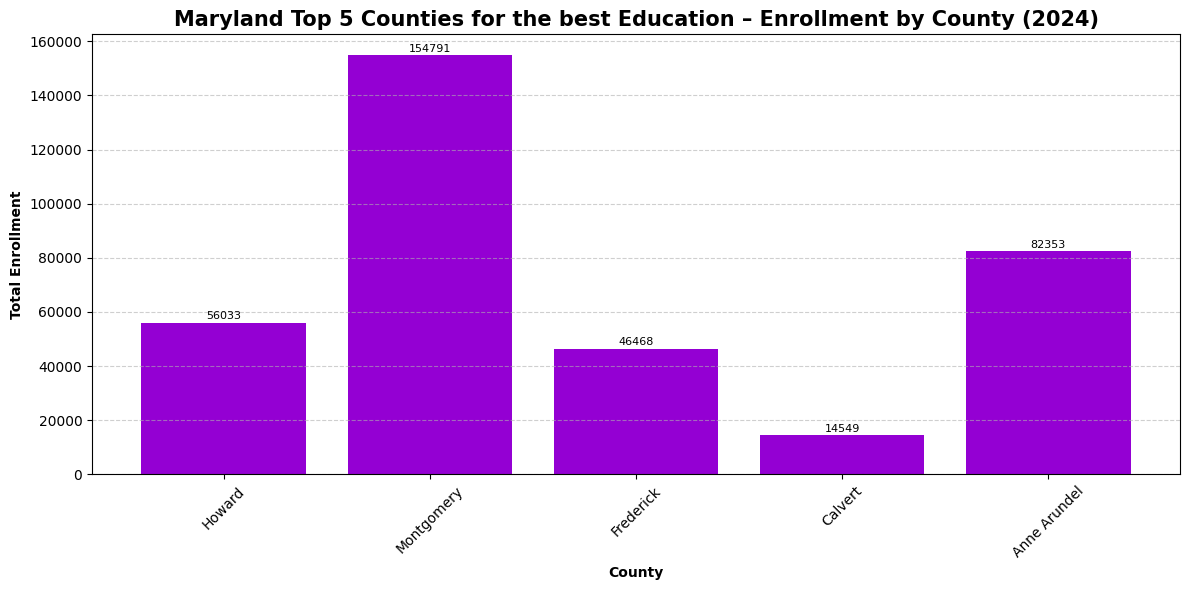

In [24]:
county_data = maryland_enrollment_df[["howard_county_tot",	"montgomery_county_tot", 	"frederick_county_tot", 	"calvert_county_tot",	"anne_arundel_county_tot"]]

county_2024 = county_data[maryland_enrollment_df["year"] == 2024]

county_totals = county_2024.filter(like="_county_tot", axis=1)

# Create variables for x (county names) and y (total enrollment values)
x = [col.replace("_county_tot", "").replace("_", " ").title() for col in county_totals.columns]  # Clean names for labels
y = county_totals.iloc[0].astype(str).str.replace(",", "").astype(int)  # Convert values to integers

# Plot bar graph
plt.figure(figsize=(12,6))
plt.bar(x, y, color="darkviolet")
plt.xticks(rotation=45) # Rotates the x-axis labels to 45 degree angle
plt.xlabel("County", weight = 'bold')
plt.ylabel("Total Enrollment",weight= 'bold')
plt.title("Maryland Top 5 Counties for the best Education – Enrollment by County (2024)", weight= 'bold', fontsize= 15)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Adds the Value on the top of the bar
for i, val in enumerate(y):
    plt.text(i, val + 500, str(val), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### **Data Visualization 2**: Line Graph

In this graph, I wanted to take a deeper dive into Maryland counties, and I decided to do Montgomery County Public Schools. Specifically I did a line graph to see the trend in the enrollment from 2014-2014. To my findings, I noticed that the peak enrollment was in 2019. From 2014-2019 there was a constant increase, but in 2020 I found a dramatic drop. This was definetely due to covid. Since there has been a common trend of staying very low. Hopefully as the years go on, there can be an increase in enrollment rates.

(150000.0, 161000.0)

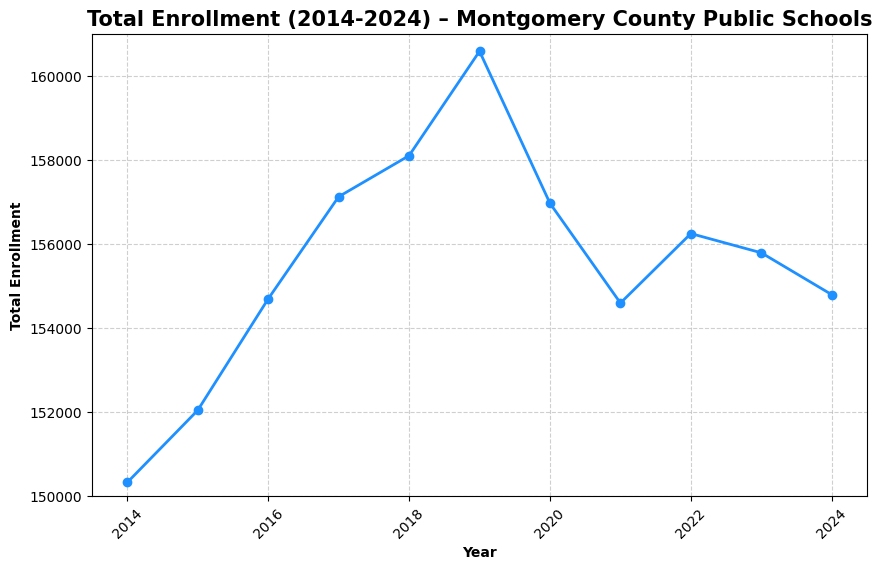

In [31]:
plt.figure(figsize=(10,6))
plt.plot(maryland_enrollment_df["year"], maryland_enrollment_df["tot_enrollment"], marker="o", color="dodgerblue", linewidth=2)

plt.xlabel("Year", weight = 'bold')
plt.ylabel("Total Enrollment", weight= 'bold')
plt.title("Total Enrollment (2014-2024) – Montgomery County Public Schools", weight= 'bold', fontsize= 15)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(150000, 161000)  # sets y-axis range


### **Data Visualization 3**: Multi Group Bar Graph

Lastly, for this final graph, I chose to do a multi-bar graph to visualize the breakdown in enrollments from 2014-2024 in Montgomery County to see which grade(K-5 grade || 6-8 grade || 9-12 grade) had the highest enrollments. To my findings, there was a constant trend of Elementary Schools having the highest, high school with the second highest, and middle school with the lowest enrollment rates. Middle school being the lowest was a surprise to me, and made me question why. After some research, I found that a lower middle school and high school enrollments show a decrease due to a change of education like being home-schooled or enrolling into a private school. Other reasons include moving to a different state or county.

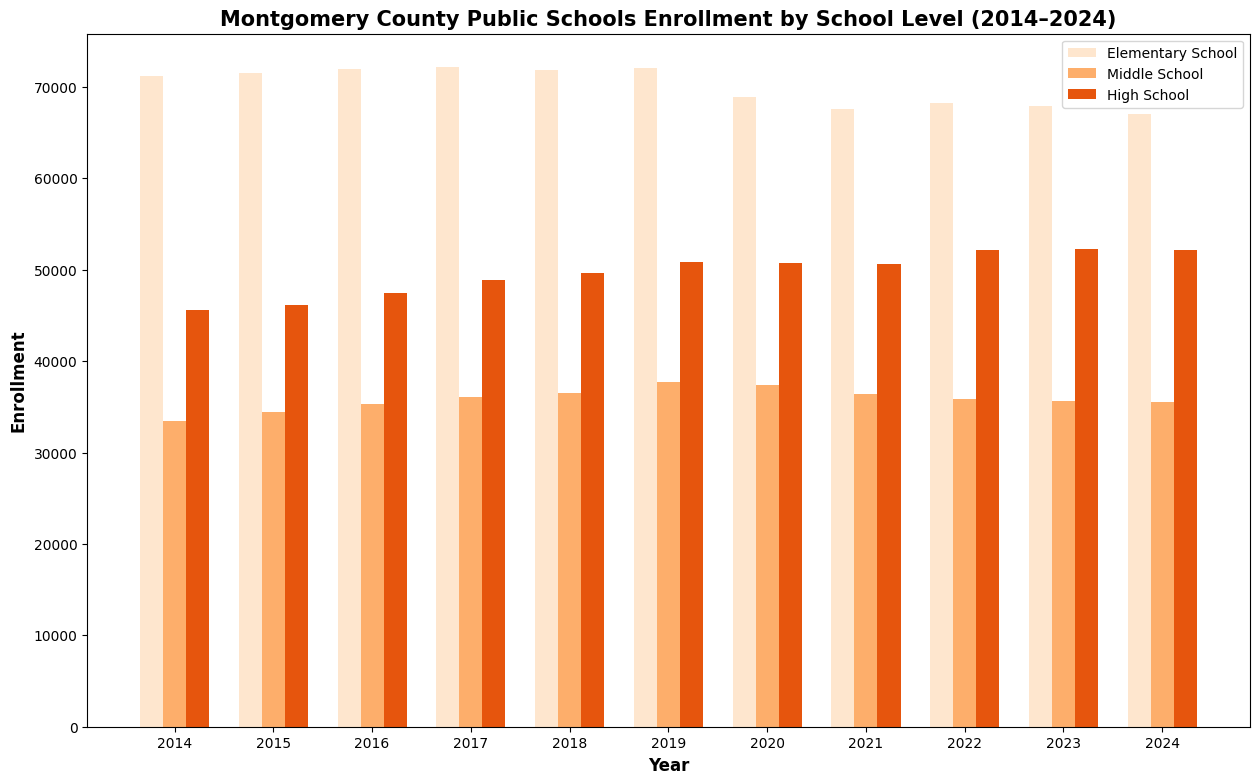

In [21]:
x = np.arange(len(maryland_enrollment_df["year"])) * 1.5  # add spacing between year groups
width = 0.35  # width of each bar

plt.figure(figsize=(15, 9))

plt.bar(x - width, maryland_enrollment_df["elementary_school_tot"], width, label="Elementary School", color="#fee6ce")
plt.bar(x, maryland_enrollment_df["middle_school_tot"], width, label="Middle School", color="#fdae6b")
plt.bar(x + width,maryland_enrollment_df["highschool_tot"], width, label="High School", color="#e6550d")

plt.xlabel("Year", weight='bold', fontsize= 12)
plt.ylabel("Enrollment", weight='bold', fontsize = 12)
plt.title("Montgomery County Public Schools Enrollment by School Level (2014–2024)", fontsize = 15, weight= 'bold')
plt.xticks(x, maryland_enrollment_df["year"])  # label each year
plt.legend()


plt.show()


# **4. Conclusion**:
To conclude, I was able to find the different enrollment trends in Maryland. I was able to make/find connection to my questions that all flowed together. I had started off with the wide stream part of Maryland, examining the enrollment rates for the top 5 counties with the best education systems. Then took a deeper dive into the whole dataset year from 2014-2024 in Montgomery County, and the enrollment trends through those years. Lastly took an even deeper dive to see which grade make up for the total enrollment through 2014-2024 in Montgomery County.
